### <font color = Lightgreen></center>  **APPLIANCES ENERGY CONSUMPTION PREDICTION**   </fonts>

#### <font color = Pink></center>  **PROBLEM STATEMENT**   </fonts>

The Increasing Demand for Energy has lead to a significant rise in greenhouse gas emissions,contributing to climate change .
Optimizing energy consumption has become a critical concern for households , businesses governments worldwide.
In response this Project aims to develop a predictive model that forecasts appliance energy consumption using 
a comprehensive dataset of environmental factors and appliance usage patterns.
For that, I implement all regression models and conduct model evaluation techniques and following steps to find 
the best performance model.

#### <font color = Pink></center>  **PROBLEM DESCRIPTION**   </fonts>

The appliances energy prediction dataset contains measurements of appliance energy 
consumption and various environmental factors such as temparature,Humidity and 
outdoor weather conditions .However Predicting appliance energy consumption remains a 
challenging task due to the complexity of the realtionships between these factors.

#### <font color = Pink></center>  **PROJECT OBJECTIVES**   </fonts>

To develop a predictive model that accurately forecasts appliance energy consumption. 
To Identify the most significant environmental factors that impact appliance energy consumption. 
To provide Insights and recommendations for households and businesses to optimize their energy usage 
and reduce waste.

###### <font color = Pink></center>  **DATASET CHARACTERISTICS**   </fonts>

###### <font color = Lightblue></center>  **Type:**   </fonts>   Regression

###### <font color = Lightblue></center>  **Features:**   </fonts>  29 Features Including Temparature,Humidity ,Lighting ,Appliance Usage

###### <font color = LightBlue></center>  **Target Variable:**   </fonts>  Energy Consumption of Appliances(In Wh)

###### <font color = LightBlue></center>  **Source:**   </fonts> UCI Machine learning Repository

#### <font color = Lightgreen></center>  **LOADING AND PREPROCESSING**   </fonts>

##### <font color = Pink></center>  **Import Necessary Libraries**   </fonts>

In [9]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

#### <font color = Pink></center>  **Load the Dataset**   </fonts>

In [11]:
data = pd.read_csv("C:\\Users\\hp\\Downloads\\appliances+energy+prediction.zip")
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


#### <font color = Pink></center>  **Structure of the dataset**   </fonts>

##### <font color = Lightblue></center>  _Shape of the Dataset_   </fonts>

In [13]:
print ("Shape of the dataset is" , data.shape)

Shape of the dataset is (19735, 29)


##### <font color = Lightblue></center> _Display First few rows_   </fonts>

In [15]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


##### <font color = LightBlue></center>  _Data Information_  </fonts>

In [17]:
print("\nFeature names and its datatypes:")
data.info()


Feature names and its datatypes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8        

##### <font color = LightBlue></center>  _Statistical Analysis of the data_  </fonts>

In [19]:
print("Summary Statistics of the data:")
print("\t")
data.describe()

Summary Statistics of the data:
	


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


##### <font color = LightBlue></center> _Column Names of Dataset_ </fonts>

In [21]:
print("Columns of the dataset:")
data.columns

Columns of the dataset:


Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

#### <font color = Pink></center>  **Check Missing Values**   </fonts>

In [23]:
#Find the Missing values or null Values
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

#### <font color = Pink></center>  **Check Duplicates**   </fonts>

In [25]:
#Find Duplicate Values in dataset
print("Duplicates in the dataset are:")
data.duplicated().sum()

Duplicates in the dataset are:


0

### <font color = Lightgreen></center>  **UNIVARIATE ANALYSIS**   </fonts>

#### <font color = Pink></center>  **_Histogram to Visualize Feature Distribution_**   </fonts>

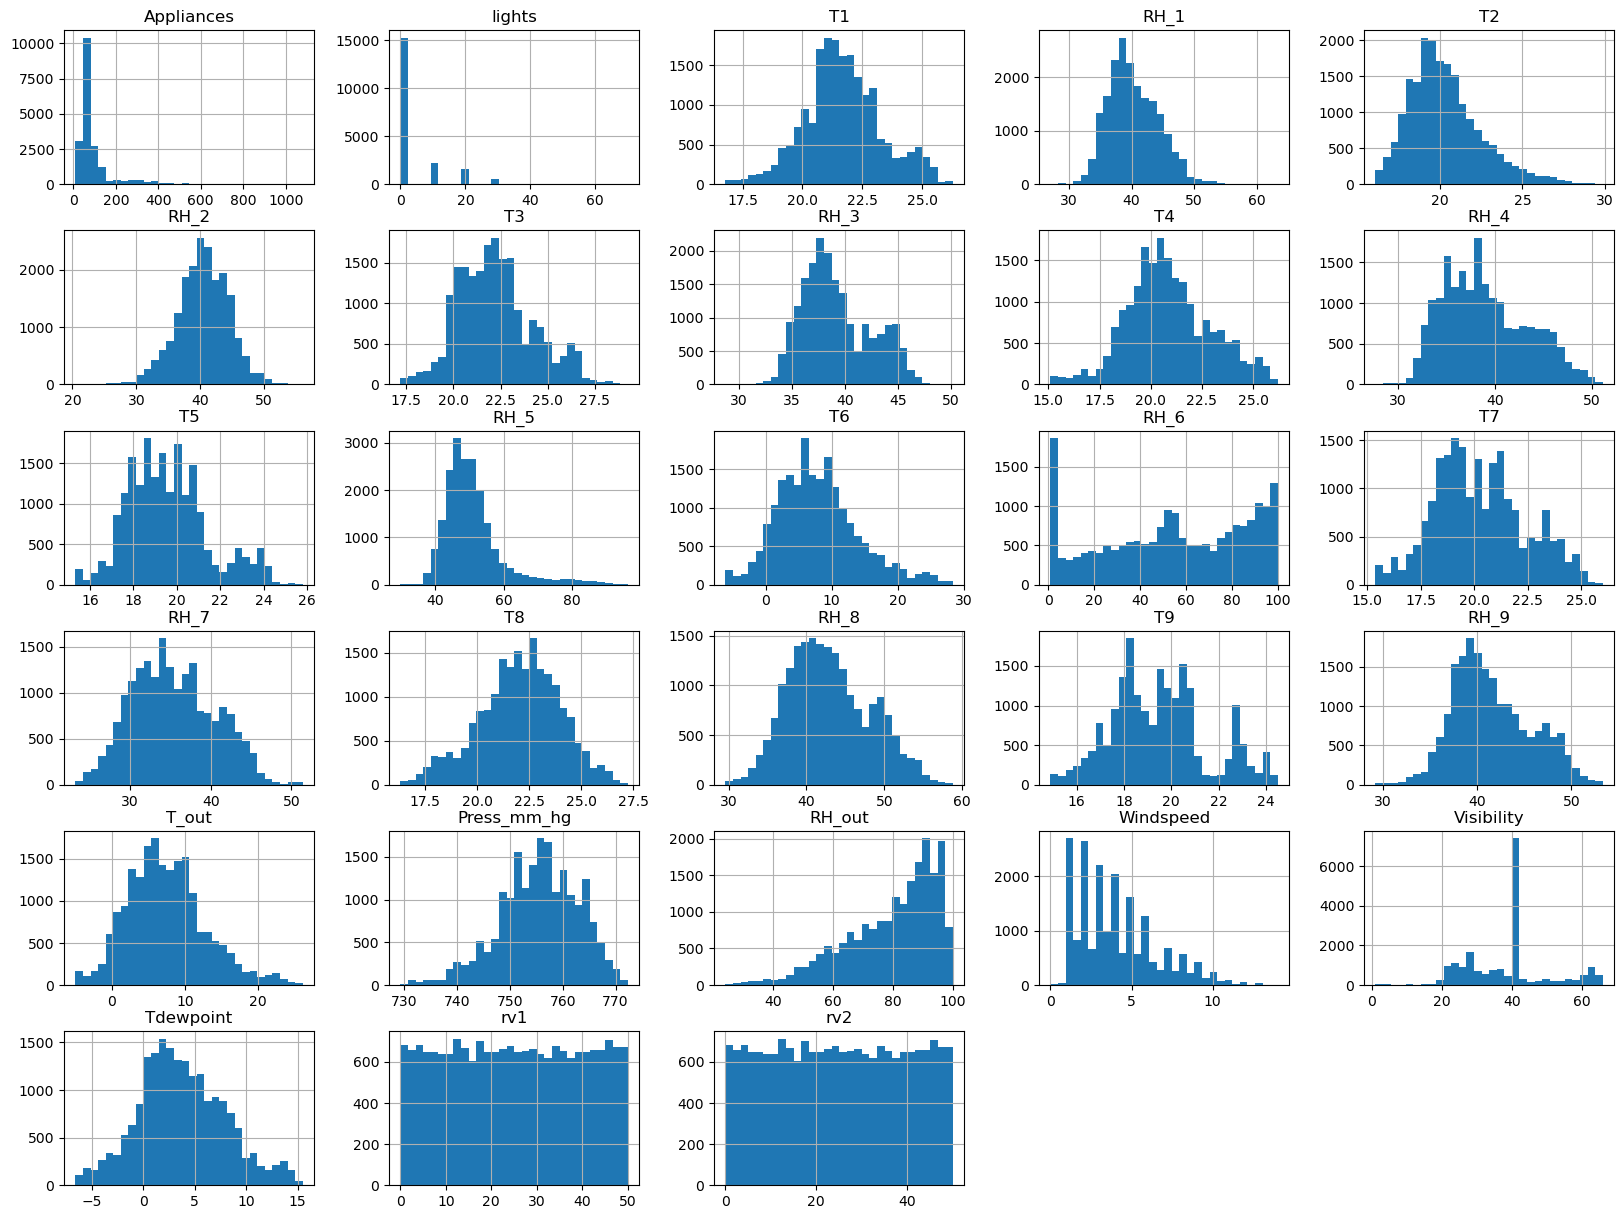

In [27]:
data.hist(figsize=(20,15) ,bins=30)
plt.show()

#### <font color = Pink></center>  _Boxplot to find Outliers_    </fonts>

<function matplotlib.pyplot.show(close=None, block=None)>

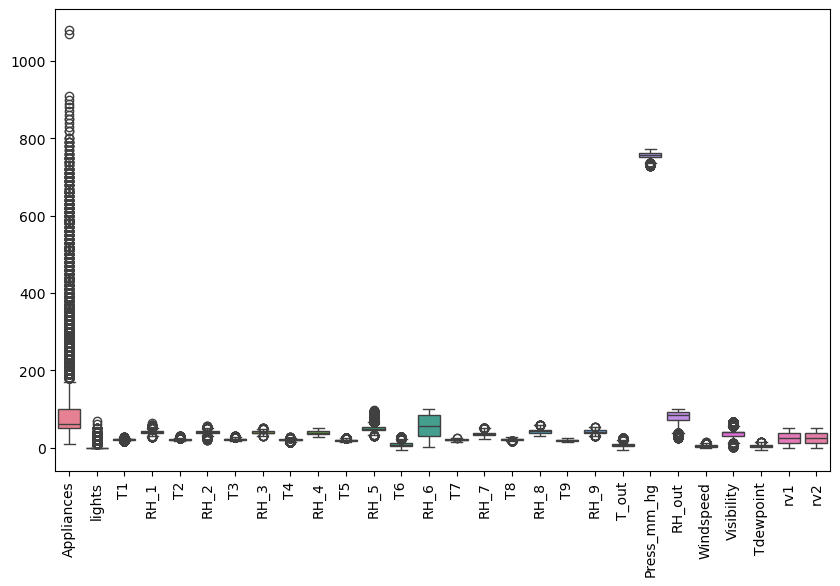

In [29]:
#Boxplot detecting outliers in energy consumpion
plt.figure(figsize=(10,6))
sns.boxplot(data = data)
plt.xticks(rotation=90)
plt.show

#### <font color = Pink></center>  _Time Series LinePlot_  </fonts>

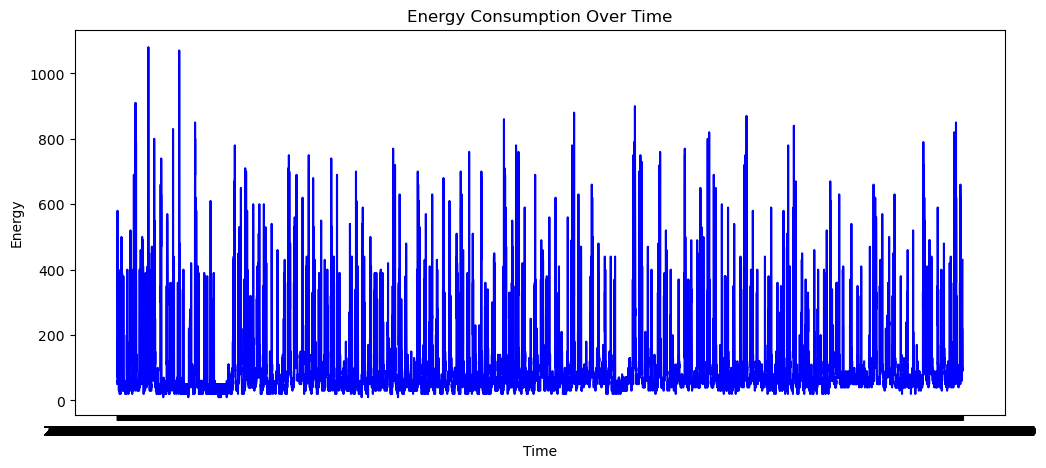

In [31]:
plt.figure(figsize=(12,5))
plt.plot(data['date'],data['Appliances'],color='blue')
plt.title("Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.show()

### <font color = Lightgreen></center>  **BIVARIATE ANALYSIS**   </fonts>

#### <font color = Pink></center>  _Correlation heatmap_    </fonts>

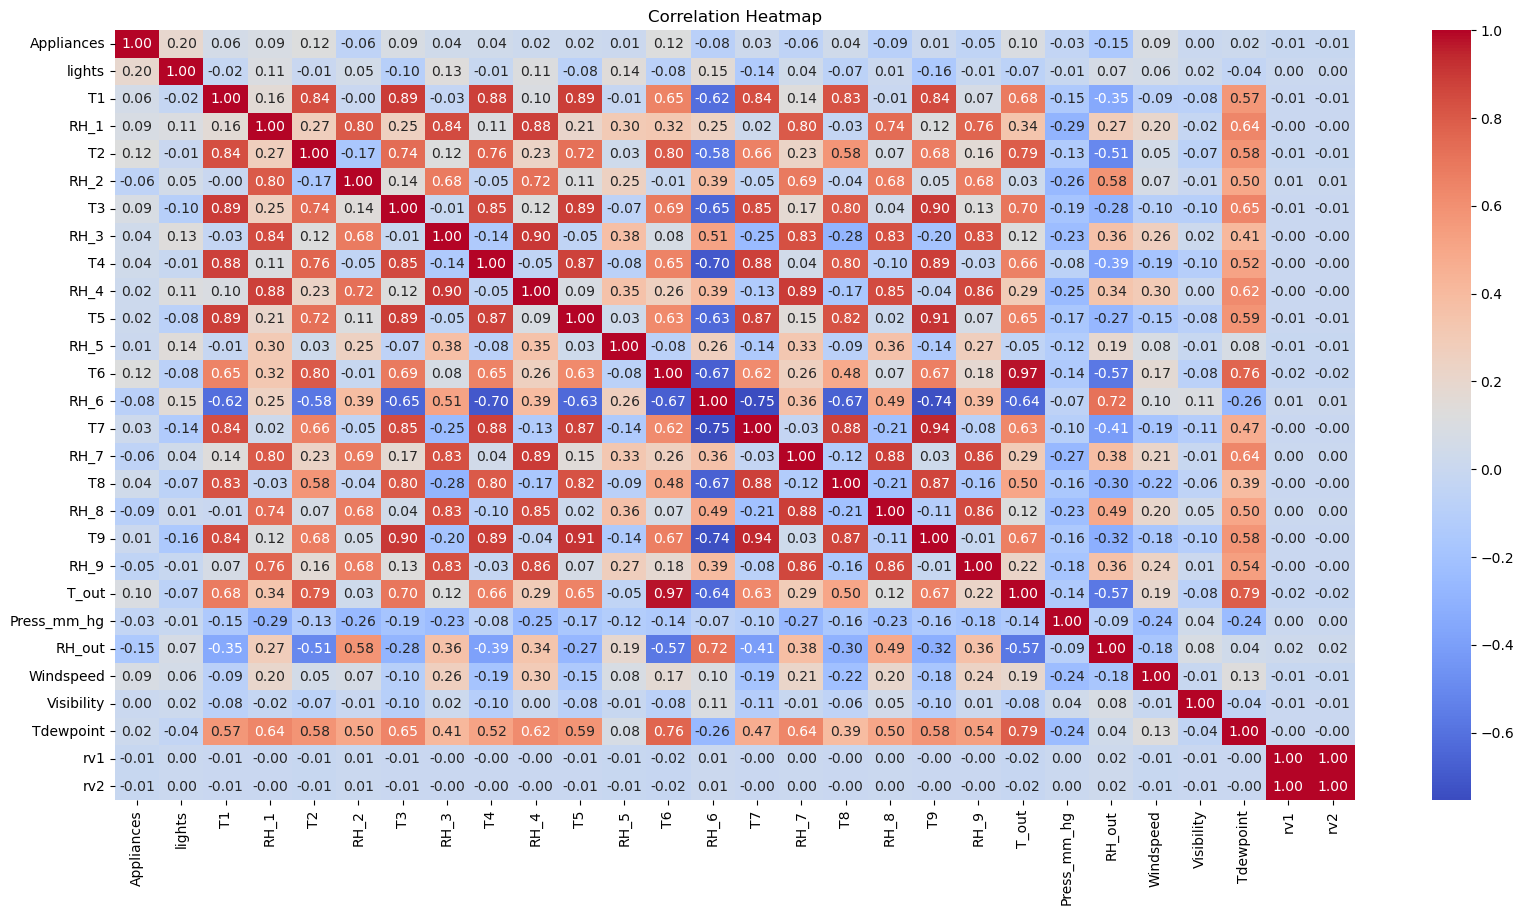

In [32]:
#Correlation Heatmap - Feature relationships
numerical_data = data.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(20,10))
sns.heatmap(numerical_data.corr(),annot=True ,cmap ='coolwarm',fmt =".2f")
plt.title("Correlation Heatmap")
plt.show()

#### <font color = Pink></center> _Scatterplot of Temparature Vs Energy Consumption_    </fonts>

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['T1'],y=data['Appliances'],alpha =0.9,color='green')
plt.title("Temparature Vs Energy Consumption")
plt.show()

#### <font color = Lightgreen></center> MULTIVARIATE ANALYSIS   </fonts>

#### <font color = Pink></center> _Pairplot - Relationship between multiple features_   </fonts>

In [ ]:
sns.pairplot(data[['T1','RH_1','Windspeed','Appliances']])
plt.show()

#### <font color = Pink></center> _Average Energy consumption by hour of the day_   </fonts>

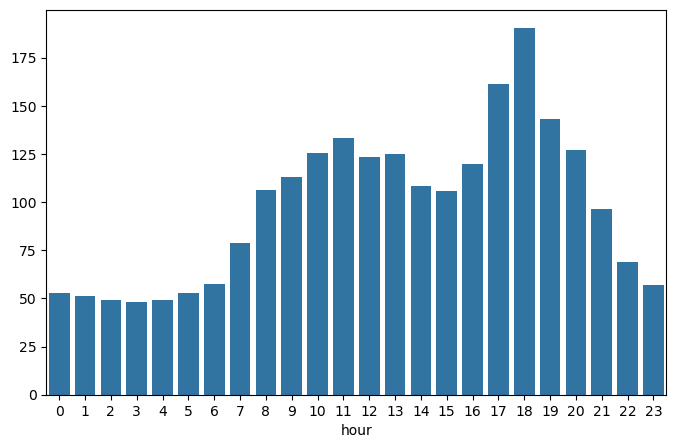

In [33]:
#Extract hour feature from date column
data['hour'] = pd.to_datetime(data['date']).dt.hour


Hourly_consumption = data.groupby('hour')['Appliances'].mean()

#plot barplot to visualise Average energy consumption by hour of the day
plt.figure(figsize=(8,5))
sns.barplot(x=Hourly_consumption.index ,y=Hourly_consumption.values)
plt.show()

#### <font color = Pink></center>   _Skewness and Kurtosis_  </fonts>

In [34]:
numeric_columns = data.select_dtypes(include=['int64','float64']).columns

skewness = data[numeric_columns].skew()
Kurtosis = data[numeric_columns].kurt()
print(f"skewness:{skewness}")
print(f"\nKurtosis:{Kurtosis}")

skewness:Appliances     3.386367
lights         2.195155
T1             0.120917
RH_1           0.465774
T2             0.889658
RH_2          -0.268247
T3             0.450777
RH_3           0.467589
T4             0.170384
RH_4           0.444614
T5             0.558220
RH_5           1.866820
T6             0.597471
RH_6          -0.241961
T7             0.254722
RH_7           0.242141
T8            -0.256151
RH_8           0.308036
T9             0.382711
RH_9           0.368937
T_out          0.534273
Press_mm_hg   -0.420442
RH_out        -0.922997
Windspeed      0.859982
Visibility     0.441554
Tdewpoint      0.239374
rv1            0.004945
rv2            0.004945
dtype: float64

Kurtosis:Appliances     13.667863
lights          4.462147
T1              0.161601
RH_1            0.112629
T2              0.933397
RH_2            0.670959
T3             -0.007055
RH_3           -0.583126
T4             -0.037633
RH_4           -0.613967
T5              0.112724
RH_5            4.5

In [ ]:
skewed_columns = skewness[abs(skewness) > 1].index
kurtotic_columns = Kurtosis[abs(Kurtosis) > 3].index
print(skewed_columns)

#### <font color = Pink></center>  _Detection of Outliers_    </fonts>


In [36]:
z_scores = {}
for col in skewed_columns:
    z_scores[col] =np.abs(stats.zscore(data[col]))
Threshold = 3
outliers ={}
for col ,z_score in z_scores.items():
    outliers[col] = data[z_score > Threshold]
cleaned_data =data.drop(outliers[col].index)

In [37]:
print("Shape of the dataset before removing Ouliers is" , data.shape)
print("Shape of the dataset after removing outliers is" , cleaned_data.shape)

Shape of the dataset before removing Ouliers is (19735, 30)
Shape of the dataset after removing outliers is (19168, 30)


#### <font color = Pink></center>  _Feature Engineering_    </fonts>

In [38]:
# Convert 'date' to datetime
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'])

# Extract new time-based features
cleaned_data['hour'] = cleaned_data['date'].dt.hour
cleaned_data['day'] = cleaned_data['date'].dt.day
cleaned_data['month'] = cleaned_data['date'].dt.month

In [39]:
# Drop the original 'date' column (if it's not needed)
cleaned_data.drop(columns=['date'], inplace=True)

#### <font color = Pink></center>  _Feature Selection_   </fonts>

In [40]:
numerical_cols = cleaned_data.select_dtypes(include=['number']).columns

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data[numerical_cols])
scaled_data

array([[-0.36054751,  3.37678474, -1.11089465, ...,  0.82225624,
        -0.60146365, -1.57827033],
       [-0.36054751,  3.37678474, -1.11089465, ...,  0.82225624,
        -0.60146365, -1.57827033],
       [-0.4582388 ,  3.37678474, -1.11089465, ...,  0.82225624,
        -0.60146365, -1.57827033],
       ...,
       [ 1.6909695 ,  0.81118592,  2.37045964, ...,  0.82225624,
         1.29513908,  1.41167687],
       [ 3.1563388 ,  0.81118592,  2.37045964, ...,  0.82225624,
         1.29513908,  1.41167687],
       [ 3.25403008,  0.81118592,  2.37045964, ...,  0.96741597,
         1.29513908,  1.41167687]])

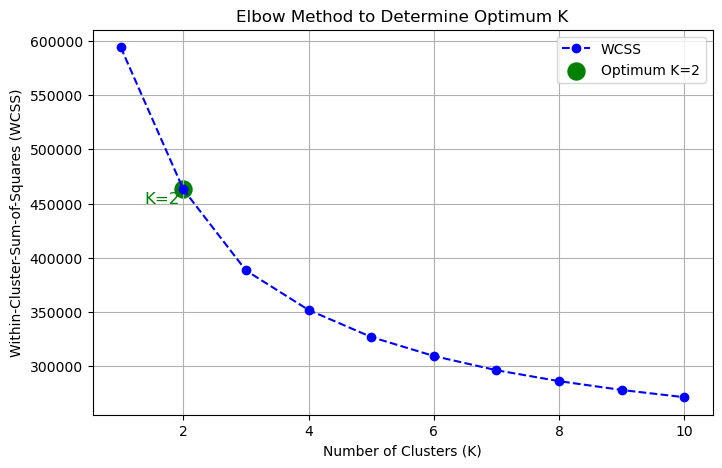

In [41]:
#Find the optimum K using the Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares
k_values = range(1, 11)  # Testing K from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # Store WCSS for each K

# Determine the "elbow" point (Replace with your optimal K)
optimal_k = 2  # Manually select or use KneeLocator for automation

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='b', label="WCSS")

# Highlight the optimum K value
plt.scatter(optimal_k, wcss[optimal_k - 1], color='green', s=150, marker='o', label=f"Optimum K={optimal_k}")
plt.annotate(f"K={optimal_k}", (optimal_k, wcss[optimal_k - 1]),
             textcoords="offset points", xytext=(-15, -10), ha='center', fontsize=12, color='green')

# Labels and Title
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster-Sum-of-Squares (WCSS)")
plt.title("Elbow Method to Determine Optimum K")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [42]:
# Apply K-Means clustering (choosing k=2 based on the previous visualization)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(scaled_data)

# Compute feature importance using cluster centers
feature_importance = np.std(kmeans.cluster_centers_, axis=0)

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': numerical_cols, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display most important features
print("Feature Importance based on K-Means Clustering:")
print(feature_importance_df)

# Select top N features (e.g., top 5)
top_features = feature_importance_df['Feature'].head(5).values
selected_data = cleaned_data[top_features]

print("Selected_features:" , top_features)

Feature Importance based on K-Means Clustering:
        Feature  Importance
18           T9    0.811523
14           T7    0.801260
8            T4    0.778903
10           T5    0.778461
6            T3    0.774531
13         RH_6    0.772758
30        month    0.772113
20        T_out    0.754778
12           T6    0.749575
2            T1    0.733491
4            T2    0.729185
16           T8    0.685082
25    Tdewpoint    0.562642
22       RH_out    0.487396
3          RH_1    0.148458
28         hour    0.140377
1        lights    0.130628
11         RH_5    0.119747
7          RH_3    0.114811
29          day    0.113822
17         RH_8    0.098955
24   Visibility    0.097824
23    Windspeed    0.096387
21  Press_mm_hg    0.079397
0    Appliances    0.064712
5          RH_2    0.059246
15         RH_7    0.051917
9          RH_4    0.020277
26          rv1    0.011843
27          rv2    0.011843
19         RH_9    0.008032
Selected_features: ['T9' 'T7' 'T4' 'T5' 'T3']


#### <font color = Pink></center> _Split Data Into Training and Testing_   </fonts>

In [43]:
#Define the Features (X) and target variable(Y)
X= cleaned_data[['T9','T7','T4','T5','T3']]
Y= cleaned_data['Appliances']

#Split data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print("Training set size:" ,len(X_train))
print("Testing set size:" , len(X_test))

Training set size: 15334
Testing set size: 3834


#### <font color = Pink></center> _Feature Scaling_  </fonts>

In [44]:
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### <font color = Lightgreen></center>  **MODEL IMPLEMENTATION**   </fonts>

In [45]:
# Initialize the regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Ridge Regression": Ridge(alpha=1.0)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    # Train the model
    model.fit(X_train, Y_train)
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    
    # Save results
    results[name] = {"R-squared": r2, "MSE": mse, "MAE": mae}
    print(f"{name} - R-squared: {r2:.3f}, MSE: {mse:.3f}, MAE: {mae:.3f}")
    print("-" * 50)

# Display results in a DataFrame
results_df = pd.DataFrame(results).T  # Transpose for better readability
print("\nComparison of Model Performance:")
print(results_df)

# Sort the results by R-squared for better visualization
sorted_results = results_df.sort_values(by="R-squared", ascending=False)
print("\nSorted Results by R-squared:")
print(sorted_results)

Training and evaluating Linear Regression...
Linear Regression - R-squared: 0.033, MSE: 9928.148, MAE: 59.585
--------------------------------------------------
Training and evaluating Decision Tree Regressor...
Decision Tree Regressor - R-squared: 0.072, MSE: 9532.289, MAE: 41.217
--------------------------------------------------
Training and evaluating Random Forest Regressor...
Random Forest Regressor - R-squared: 0.498, MSE: 5160.430, MAE: 34.815
--------------------------------------------------
Training and evaluating Gradient Boosting Regressor...
Gradient Boosting Regressor - R-squared: 0.142, MSE: 8815.923, MAE: 53.986
--------------------------------------------------
Training and evaluating Ridge Regression...
Ridge Regression - R-squared: 0.033, MSE: 9928.120, MAE: 59.585
--------------------------------------------------

Comparison of Model Performance:
                             R-squared          MSE        MAE
Linear Regression             0.033468  9928.147850  59.

Based on these metrics ,we can compare the performance of each model and select the one
with highest R2 Value,Lowest MSE Value and MAE Value.
In the sorted Result , the topmost model is Random forest Regressor .

The best model is the **Random Forest Regressor** ,which has the _highest R2 value_ (0.542),
indicating the best fit , and the _lowest MSE_ (4577.9) and _MAE_ (32.25) values ,indicating
the smallest average squared and absolute errors respectively.

#### <font color = Lightgreen></center>  **HYPERPARAMETER TUNING**   </fonts>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define hyperparameter grid for Random Forest Regressor
rf_param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Define hyperparameter grid for Gradient Boosting Regressor
gb_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.7, 0.8, 1.0]
}

# Initialize models
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
gb = GradientBoostingRegressor(random_state=42)

# Apply RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=20,  # Reduce this for faster execution
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring="r2",
    random_state=42
)

gb_random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=gb_param_grid,
    n_iter=20,  # Reduce this for faster execution
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring="r2",
    random_state=42
)

# Run tuning
print("Tuning Random Forest Regressor...")
rf_random_search.fit(X_train, Y_train)

print("\nTuning Gradient Boosting Regressor...")
gb_random_search.fit(X_train, Y_train)

# Display best parameters and scores
print("\nBest Parameters for Random Forest:", rf_random_search.best_params_)
print("Best R-squared Score:", rf_random_search.best_score_)

print("\nBest Parameters for Gradient Boosting:", gb_random_search.best_params_)
print("Best R-squared Score:", gb_random_search.best_score_)

# Evaluate the best models on test data
best_rf = rf_random_search.best_estimator_
best_gb = gb_random_search.best_estimator_

rf_preds = best_rf.predict(X_test)
gb_preds = best_gb.predict(X_test)

rf_r2 = r2_score(Y_test, rf_preds)
gb_r2 = r2_score(Y_test, gb_preds)

rf_mse = mean_squared_error(Y_test, rf_preds)
gb_mse = mean_squared_error(Y_test, gb_preds)

rf_mae = mean_absolute_error(Y_test, rf_preds)
gb_mae = mean_absolute_error(Y_test, gb_preds)

print("\nFinal Metrics on Test Data:")
print(f"Random Forest - R²: {rf_r2:.3f}, MSE: {rf_mse:.3f}, MAE: {rf_mae:.3f}")
print(f"Gradient Boosting - R²: {gb_r2:.3f}, MSE: {gb_mse:.3f}, MAE: {gb_mae:.3f}")

#### <font color = Lightgreen></center>  **PIPELINE BUILDING**   </fonts>

In [ ]:
from sklearn.pipeline import Pipeline

#Create a pipeline with scaling and modeling steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: scale the data
    ('rf', RandomForestRegressor(random_state=42, n_jobs=-1))  # Modeling step: random forest regressor
])
#Train the pipeline
pipeline.fit(X_train, Y_train)
#Predictions on testing data
y_pred = pipeline.predict(X_test)
#Evaluate the performance of pipeline
mse = mean_squared_error(Y_test, y_pred)
from sklearn.pipeline import Pipeline

#Create a pipeline with scaling and modeling steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: scale the data
    ('rf', RandomForestRegressor(random_state=42, n_jobs=-1))  # Modeling step: random forest regressor
])
#Train the pipeline
pipeline.fit(X_train, Y_train)
#Predictions on testing data
y_pred = pipeline.predict(X_test)
#Evaluate the performance of pipeline
mse = mean_squared_error(Y_test, y_pred)
mae = mean_squared_error(Y_test,y_pred)
r2 = mean_squared_error(Y_test ,y_pred)

#print metrics on test data
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error:{mae:.4f}')
print(f'R2 Score:{r2:.4f}')

In [ ]:
#Save the trained pipeline 
joblib.dump(pipeline,"Random forest regressor.joblib")
print("Pipeline saved Succesfully")

#### <font color = Lightgreen></center> **TESTING WITH UNSEEN DATA**   </fonts>

In [ ]:
# Loading unseen data
unseen_data = data.sample(n=12000, random_state=42)
unseen_data

In [ ]:
print("The shape of the dataset before removing the duplicates is", unseen_data.shape)
print("The shape of the dataset after removing the duplicates is", unseen_data.shape)

In [ ]:
# Select numeric columns
num_cols = unseen_data.select_dtypes(include=['number']).columns

# Standardize the data
scaler = StandardScaler()
scaled_unseen_data = scaler.fit_transform(unseen_data[num_cols])

In [ ]:
# Find the optimum K using the Elbow Method
wcss_unseen = []  # Within-Cluster-Sum-of-Squares
k_values_unseen = range(1, 11)  # Testing K from 1 to 10

for k in k_values:
    kmeans_unseen = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_unseen.fit(scaled_unseen_data)
    wcss_unseen.append(kmeans_unseen.inertia_)  # Store WCSS for each K

# Determined the "elbow" point (Replace with your optimal K)
optimal_k = 2

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values_unseen, wcss_unseen, marker='o', linestyle='--', color='b', label="WCSS")
# Highlight the optimum K value
plt.scatter(optimal_k, wcss_unseen[optimal_k - 1], color='red', s=150, marker='o', label=f"Optimum K={optimal_k}")
plt.annotate(f"K={optimal_k}", (optimal_k, wcss_unseen[optimal_k - 1]), 
             textcoords="offset points", xytext=(-15, -10), ha='center', fontsize=12, color='red')

# Labels and Title
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster-Sum-of-Squares (WCSS)")
plt.title("Elbow Method to Determine Optimum K")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# Apply K-Means clustering (choosing k=2 based on the previous visualization)
kmeans_unseen = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_unseen.fit(scaled_unseen_data)

# Compute feature importance using cluster centers
feature_importance_unseen = np.std(kmeans_unseen.cluster_centers_, axis=0)

# Create a DataFrame to display feature importance
feature_importance_unseen_df = pd.DataFrame({'Feature': num_cols, 'Importance': feature_importance_unseen})
feature_importance_unseen_df = feature_importance_unseen_df.sort_values(by='Importance', ascending=False)

# Display most important features
print("Feature Importance based on K-Means Clustering:")
print(feature_importance_unseen_df)

# Select top N features (e.g., top 5)
top_features_unseen = feature_importance_unseen_df['Feature'].head(5).values
selected_unseen_data = unseen_data[top_features_unseen]

print("Selected Features in Unseen Data:"

In [ ]:
# Define Features (X) and Target Variable (y)
X_unseen = unseen_data[['T9', 'T7','T4','T5','T3']]  # Selected Features
y_unseen = unseen_data['Appliances']  # Target variable

# Perform Train-Test Split (80% Train, 20% Test)
X_unseen_train, X_unseen_test, y_unseen_train, y_unseen_test = train_test_split(X_unseen, y_unseen, test_size=0.2, stratify=y_unseen, random_state=42)

# Display the Shape of Split Data
print("Training Set Shape:", X_unseen_train.shape)
print("Testing Set Shape:", X_unseen_test.shape)

In [ ]:
# Make predictions on unseen data
predictions = loaded_model.predict(X_unseen)

In [ ]:
# Output predictions
print("Predictions on Unseen Data:", predictions[:40])

#### <font color = Lightgreen></center> **LIMITATIONS**   </fonts>

#### <font color = Lightgreen></center> **FUTURE IMPROVEMENTS**   </fonts>